**Nama Anggota:**
1. Lisya Apriliani       24060119120016
2. Roikhatul Miskiyah    24060119120021
3. Kania Zalfa Huwaida   24060119140117

# Latar Belakang

Perumahan di India bervariasi dari istana-istana bekas maharaja hingga bangunan apartemen modern di kota-kota besar hingga gubuk-gubuk kecil di desa-desa yang jauh. Telah terjadi pertumbuhan luar biasa di sektor perumahan India karena pendapatan telah meningkat. Inisiatif Pengukuran Hak Asasi Manusia menemukan bahwa India melakukan 60,9% dari apa yang seharusnya dimungkinkan pada tingkat pendapatannya untuk hak atas perumahan.

Menyewa, juga dikenal sebagai rent, adalah perjanjian di mana pembayaran dilakukan untuk penggunaan sementara barang, jasa, atau properti milik orang lain. Sewa kotor adalah ketika penyewa membayar jumlah sewa tetap dan pemilik membayar semua biaya properti yang secara teratur dikeluarkan oleh kepemilikan. Menyewa bisa menjadi contoh sharing economy.

Regresi yang dilakukan terhadap dataset ini dilakukan untuk menentukan model terbaik yang dapat digunakan dalam prediksi harga sewa rumah.

# Dataset
House Rent Prediction dataset merupakan dataset yang memuat informasi mengenai  lebih dari 4700 data rumah, apartemen, dan rumah susun yang tersedia untuk disewakan.Dataset ini terdiri dari beberapa atribut/fitur di antaranya adalah sebagai berikut:
1. Posted On: tanggal data masuk.
2. BHK: jumlah kamar tidur, aula, dan dapur.
3. Rent: harga sewa rumah/apartemen/rumah susun.
4. Size: ukuran rumah/apartemen/rumah susun dalam m2.
5. Floor: rumah/apartemen/rumah susun terletak di lantai berapa dari total lantai yang ada (contoh: ground dari 2, 3 dari 5, dll.)
6. Area Type: ukuran rumah/apartemen/rumah susun dikategorikan menjadi super area or carpet area, atau build area.
7. Area Locality: lokalitas rumah/apartemen/rumah susun.
8. City: kota dimana rumah/apartemen/rumah susun berada.
9. Furnishing Status: status perabotan rumah/apartemen/rumah susun, apakah furnished,semi-furnished, atau unfurnished.
10. Tenant Preferred: jenis penyewa apakah didapatkan dari owner, builder, atau agent. 
11. Bathroom: jumlah kamar mandi.
12. Point of Contact: siapa yang harus dihubungi untuk informasi lebih lanjut mengenai rumah/apartemen/rumah susun.

# Import dan Load Data

## Import Library yang Diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [4]:
df = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


# Data Understanding

In [5]:
#Jumlah baris dan kolom pada dataset
df.shape

(4746, 12)

Dataset memiliki 4746 baris dan 12 kolom

In [6]:
#Melihat kolom dan tipe data
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

Berdasarkan hasil di atas terdapat dua jenis tipe data yaitu object dan int64. Kolom dengan tipe data object adalah Posted On, Floor, Area Type,Area Locality, City, Furnishing Status, Tenant Preferred, dan Point of Contact. Sedangkan kolom dengan tipe data int64 adalah BHK, Rent, Size, dan Bathroom.

## Data Categorical

In [7]:
#Mengecek jumlah dari setiap nilai pada fitur Posted On
df["Posted On"].value_counts()

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64

Fitur Posted On memiliki 81 nilai unique

In [8]:
#Mengecek jumlah dari setiap nilai pada fitur Floor
df["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

Fitur Posted On memiliki 480 nilai unique

In [9]:
#Mengecek jumlah dari setiap nilai pada fitur Area Locality
df["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

Fitur Area Locality memiliki 2235 nilai unique

In [10]:
#Mengecek jumlah dari setiap nilai pada fitur Area Type
df["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

Fitur Area Type memiliki 3 nilai unique

In [11]:
#Mengecek jumlah dari setiap nilai pada fitur City
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Fitur City memiliki 6 nilai unique

In [12]:
#Mengecek jumlah dari setiap nilai pada fitur Tenant Preferred
df["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

Fitur Tenant Preferred memiliki 3 nilai unique

In [13]:
#Mengecek jumlah dari setiap nilai pada fitur Furnishing Status
df["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

Fitur Furnishing Status memiliki 3 nilai unique

In [14]:
#Mengecek jumlah dari setiap nilai pada fitur Point of Contact
df["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

Fitur Point of Contact memiliki 3 nilai unique

<AxesSubplot:xlabel='Area Type', ylabel='count'>

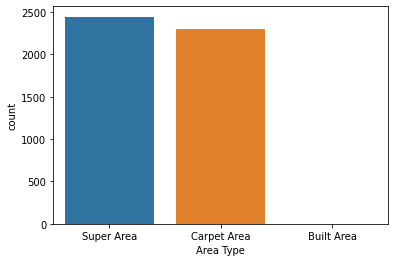

In [15]:
#Countplot Area Type
sns.countplot("Area Type",data=df)

Berdasarkan visualisasi di atas, dapat terlihat bahwa mayoritas rumah berada pada super area.

<AxesSubplot:xlabel='City', ylabel='count'>

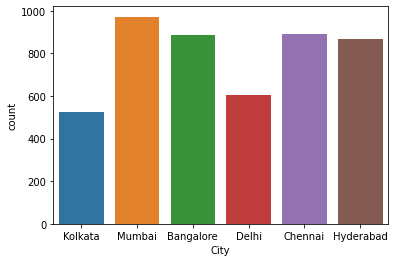

In [16]:
#Countplot City
sns.countplot("City",data=df)

Berdasarkan visualisasi di atas, dapat terlihat bahwa jumlah rumah terbanyak berada di kota Mumbai.

<AxesSubplot:xlabel='Tenant Preferred', ylabel='count'>

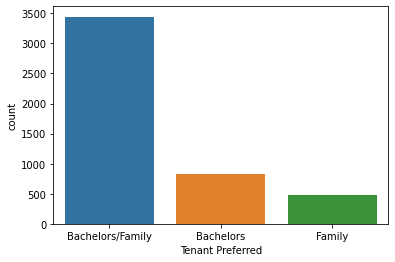

In [17]:
#Countplot Tenant Preferred
sns.countplot("Tenant Preferred",data=df)

Berdasarkan visualisasi di atas, dapat terlihat bahwa preferensi penyewa terbanyak berasal dari bachelors/family.

<AxesSubplot:xlabel='Furnishing Status', ylabel='count'>

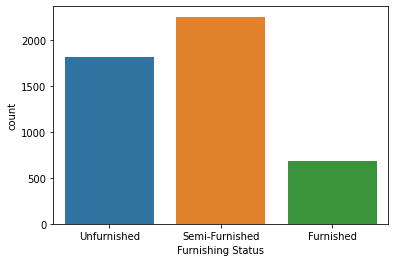

In [18]:
#Countplot Furnishing Status
sns.countplot("Furnishing Status",data=df)

Berdasarkan visualisasi di atas, dapat terlihat bahwa mayoritas rumah adalah semi furnished.

<AxesSubplot:xlabel='Point of Contact', ylabel='count'>

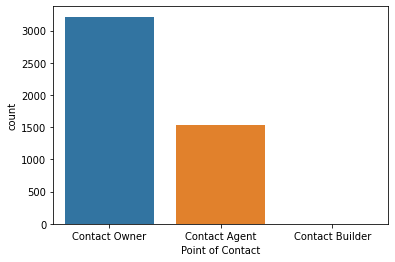

In [19]:
#Countplot Point of Contact
sns.countplot("Point of Contact",data=df)

Berdasarkan visualisasi di atas, dapat terlihat bahwa mayoritas point of contact adalah contact owner.

<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

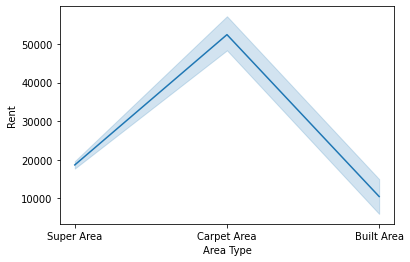

In [20]:
#Lineplot Area Type
sns.lineplot(x=df['Area Type'], y=df['Rent'])

<AxesSubplot:xlabel='City', ylabel='Rent'>

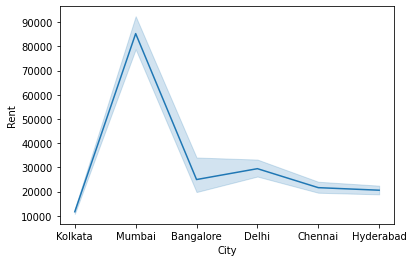

In [21]:
#Lineplot City
sns.lineplot(x=df['City'], y=df['Rent'])

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

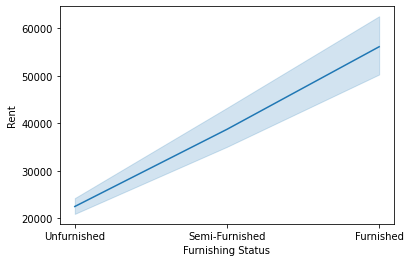

In [22]:
#Lineplot Furnishing Status
sns.lineplot(x=df['Furnishing Status'], y=df['Rent'])

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Rent'>

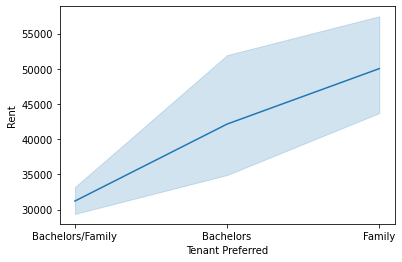

In [23]:
#Lineplot Tenant Preferred
sns.lineplot(x=df['Tenant Preferred'], y=df['Rent'])

<AxesSubplot:xlabel='Point of Contact', ylabel='Rent'>

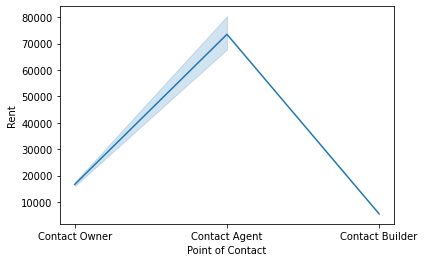

In [24]:
#Lineplot Point of Contact
sns.lineplot(x=df['Point of Contact'], y=df['Rent'])

Berdasarkan output di atas dapat disimpulkan bahwa biaya sewa pada tipe area Carpet Area lebih bervariasi dan biaya tertinggi pun berada pada area tersebut. Kemudian, jika didasarkan pada kota maka biaya sewa di kota Mumbai adalah biaya sewa yang paling mahal. Jika dilihat dari furnishing status, rumah dengan yang sudah semi furnished dan furnished harganya akan semakin mahal. Lalu untuk tenant preferred, biaya sewa akan lebih mahal jika tenant dibawa oleh keluarga. Terakhir berdasarkan kontak, jika orang yang dihubungi adalah agent maka biaya sewanya cenderung lebih mahal.

## Data Numerical

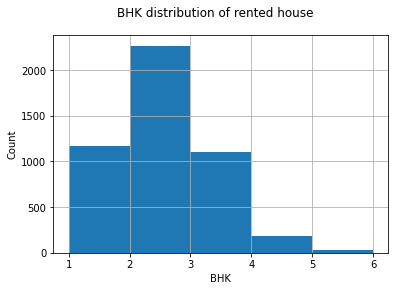

In [25]:
#BHK Distribution
df['BHK'].hist(bins=5)
plt.suptitle('BHK distribution of rented house')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

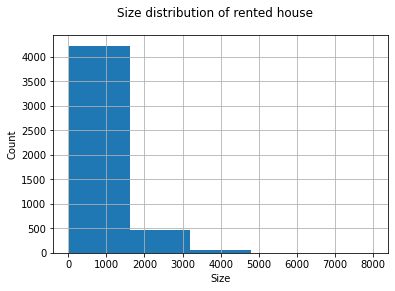

In [26]:
#Size Distribution
df['Size'].hist(bins=5)
plt.suptitle('Size distribution of rented house')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

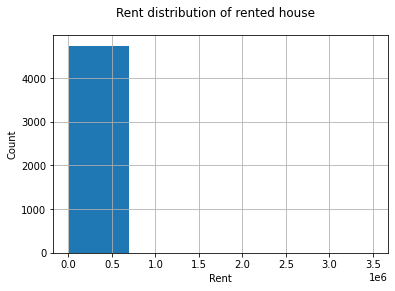

In [27]:
#Rent Distribution
df['Rent'].hist(bins=5)
plt.suptitle('Rent distribution of rented house')
plt.xlabel('Rent')
plt.ylabel('Count')
plt.show()

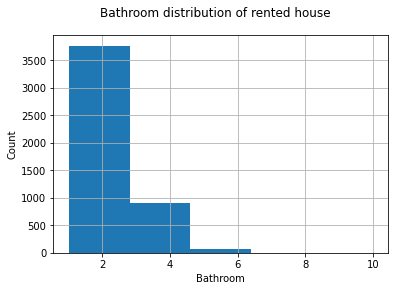

In [28]:
#Bathroom Distribution
df['Bathroom'].hist(bins=5)
plt.suptitle('Bathroom distribution of rented house')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

Berdasarkan output yang diperoleh pada gambar di atas, dapat terlihat bahwa kebanyakan rumah memiliki BHK yang berjumlah 2-3. Kemudian untuk ukuran rumah, kebanyakan berukuran kurang dari 2000m2. Untuk biaya sewa, kebanyakan rumah memiliki biaya sewa sekitar 10000-15000. Terakhir, untuk kamar mandi, kebanyakan rumah memiliki kamar mandi yang berjumlah sekitar 1-3.

In [29]:
#Describe data
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Berdasarkan output di atas, diperoleh informasi tentang jumlah, rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil bawah (25%), median (50%), kuartil .atas (75%), dan nilai maksimum (max) dari kolom BHK, Rent, Size, dan Bathroom

In [30]:
#Melihat Korelasi/Hubungan antar Kolom
df.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


Berdasarkan hasil di atas, dapat terlihat bahwa antar fitur bertipe numerical semuanya berkorelasi positif. BHK dengan bathroom memiliki nilai korelasi terbesar yaitu 0.79. Rent dan size juga mmemiliki korelasi terbesar dengan bathroom yaitu sebesar 0.44 dan 0.74.

# Data Preparation and Cleaning

## Drop kolom yang tidak diperlukan

In [31]:
#drop kolom yang tidak digunakan
df.drop(['Posted On', 'Floor','Area Locality'],axis=1,inplace=True)

Kolom 'Posted On', 'Floor', dan 'Area Locality' di-drop karena kolom-kolom tersebut memiliki banyak sekali nilai yang unique

In [32]:
#Mengecek kolom setelah drop tiga kolom
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

## Menghapus baris duplikat

In [33]:
#Menghapus baris duplikat
df = df[~df.duplicated()]

In [34]:
#Mengecek jumlah baris dan kolom setelah menghapus baris duplikat
df.shape

(4486, 9)

Untuk menghapus baris duplikat digunakan ~df.duplicated(). Hal ini dilakukan untuk menyimpan data ke dalam variabel dengan mengecualikan semua data duplikatnya. Hasilnya, setelah semua data duplikat dihapus jumlah baris yang awalnya 4746 berkurang menjadi 4486.

## Mengecek missing values

In [35]:
#Mengecek missing values
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Tidak ditemukan missing values pada data

## Outliers handling

<AxesSubplot:xlabel='BHK'>

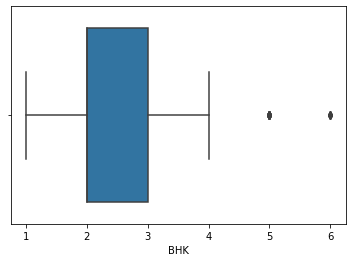

In [36]:
#Mengecek Outliers pada kolom BHK
sns.boxplot(x="BHK",data=df)

<AxesSubplot:xlabel='Rent'>

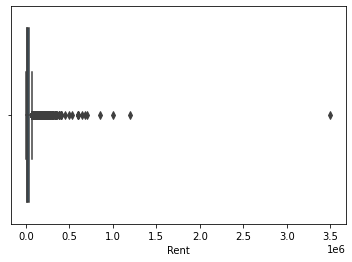

In [37]:
#Mengecek Outliers pada kolom Rent
sns.boxplot(x="Rent",data=df)

<AxesSubplot:xlabel='Size'>

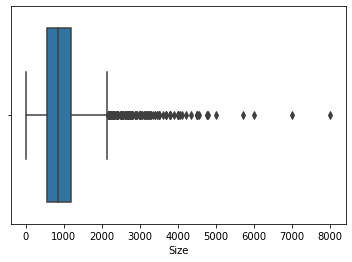

In [38]:
#Mengecek Outliers pada kolom Size
sns.boxplot(x="Size",data=df)

<AxesSubplot:xlabel='Bathroom'>

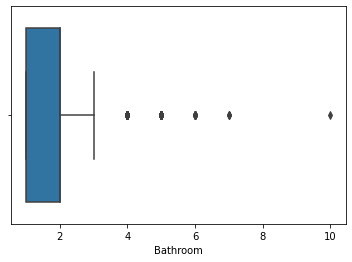

In [39]:
#Mengecek Outliers pada kolom Bathroom
sns.boxplot(x="Bathroom", data=df)

Berdasarkan gambar di atas, dapat dilihat bahwa terdapat outliers dari kolom BHK, Rent, Size, dan Bathroom. Outliers tersebut ditunjukkan dengan titik-titik yang berada di luar boxplot. 

In [40]:
#Ouliers Handling Kolom BHK
Q1=df['BHK'].quantile(0.25)
Q3=df['BHK'].quantile(0.75)
IQR=Q3-Q1
Lower_Bound = Q1 - (1.5 * IQR)
Upper_Bound = Q3 + (1.5 * IQR)

df.loc[(df['BHK']>Upper_Bound)] = df['BHK'].median()

<AxesSubplot:xlabel='BHK'>

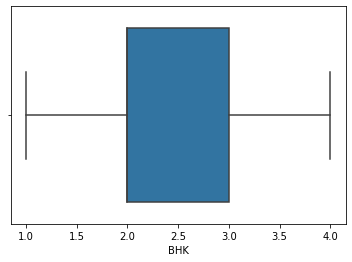

In [41]:
sns.boxplot(x="BHK",data=df)

In [42]:
#Ouliers Handling Kolom Rent
Q1_Rent=df['Rent'].quantile(0.25)
Q3_Rent=df['Rent'].quantile(0.75)
IQR_Rent=Q3_Rent-Q1_Rent
LowerBoundRent = Q1_Rent - 1.5 * IQR_Rent
UpperBoundRent = Q3_Rent + 1.5 * IQR_Rent

df.loc[(df['Rent']>UpperBoundRent)] = UpperBoundRent

<AxesSubplot:xlabel='Rent'>

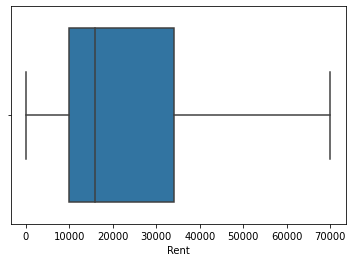

In [43]:
sns.boxplot(x="Rent",data=df)

In [44]:
#Ouliers Handling Kolom Size
Q1_Size=df['Size'].quantile(0.25)
Q3_Size=df['Size'].quantile(0.75)
IQR_Size=Q3_Size-Q1_Size
LowerBoundSize = Q1_Size - 1.5 * IQR_Size
UpperBoundSize = Q3_Size + 1.5 * IQR_Size

df.loc[(df['Size']>UpperBoundSize)] = UpperBoundSize

<AxesSubplot:xlabel='Size'>

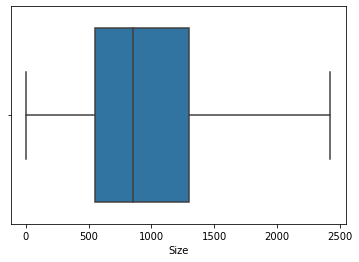

In [45]:
sns.boxplot(x="Size",data=df)

In [46]:
#Ouliers Handling Kolom Bathroom
Q1_Bathroom=df['Bathroom'].quantile(0.25)
Q3_Bathroom=df['Bathroom'].quantile(0.75)
IQR_Bathroom=Q3_Bathroom-Q1_Bathroom
LowerBoundBathroom = Q1_Bathroom - 1.5 * IQR_Bathroom
UpperBoundBathroom = Q3_Bathroom + 1.5 * IQR_Bathroom

df.loc[(df['Bathroom']>UpperBoundBathroom)] = df['Bathroom'].median()

<AxesSubplot:xlabel='Bathroom'>

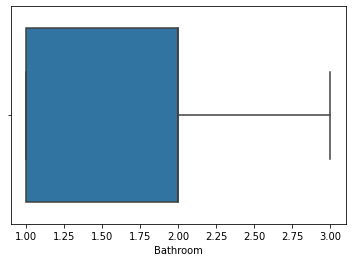

In [47]:
sns.boxplot(x="Bathroom",data=df)

Berdasarkan output boxplot di atas, sudah tidak terdapat lagi outliers pada data.

In [48]:
#Melihat tipe data setelah penanganan outliers
df.dtypes

BHK                  float64
Rent                 float64
Size                 float64
Area Type             object
City                  object
Furnishing Status     object
Tenant Preferred      object
Bathroom             float64
Point of Contact      object
dtype: object

In [49]:
#Mengubah tipe data float menjadi integer
df[['BHK','Rent','Size','Bathroom']] = df[['BHK','Rent','Size','Bathroom']].astype(int)

In [50]:
#Melihat tipe data setelah perubahan
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# Encoding

Encoding merupakan proses pengubahan data categorical ke dalam format integer sehingga data categorical tersebut dapat diolah dengan menggunakan beragam model machine learning. Salah satu cara untuk melakukan encoding adalah dengan one-hot encoding menggunakan get_dummies. Dengan get_dummies, maka data categorical akan diubah menjadi one-hot encoded matrix untuk setiap kolom target.

In [51]:
#Encoding Categorical Data
df2 = df.join(pd.get_dummies(df[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']], drop_first=True))
df2.drop(columns = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact'], inplace = True)

Berikut ini adalah output kolom dan tipe datanya setelah proses encoding. 

In [52]:
#Tipe data setelah proses encoding
df2.dtypes

BHK                                  int64
Rent                                 int64
Size                                 int64
Bathroom                             int64
Area Type_Built Area                 uint8
Area Type_Carpet Area                uint8
Area Type_Super Area                 uint8
City_Bangalore                       uint8
City_Chennai                         uint8
City_Delhi                           uint8
City_Hyderabad                       uint8
City_Kolkata                         uint8
City_Mumbai                          uint8
Furnishing Status_Furnished          uint8
Furnishing Status_Semi-Furnished     uint8
Furnishing Status_Unfurnished        uint8
Tenant Preferred_Bachelors           uint8
Tenant Preferred_Bachelors/Family    uint8
Tenant Preferred_Family              uint8
Point of Contact_Contact Agent       uint8
Point of Contact_Contact Builder     uint8
Point of Contact_Contact Owner       uint8
dtype: object

In [53]:
df2.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


Setelah proses encoding, korelasi antar setiap kolom juga dapat terlihat lebih jelas. Berikut ini adalah heatmap yang menampilkan korelasi antar kolom setelah proses encoding dilakukan.

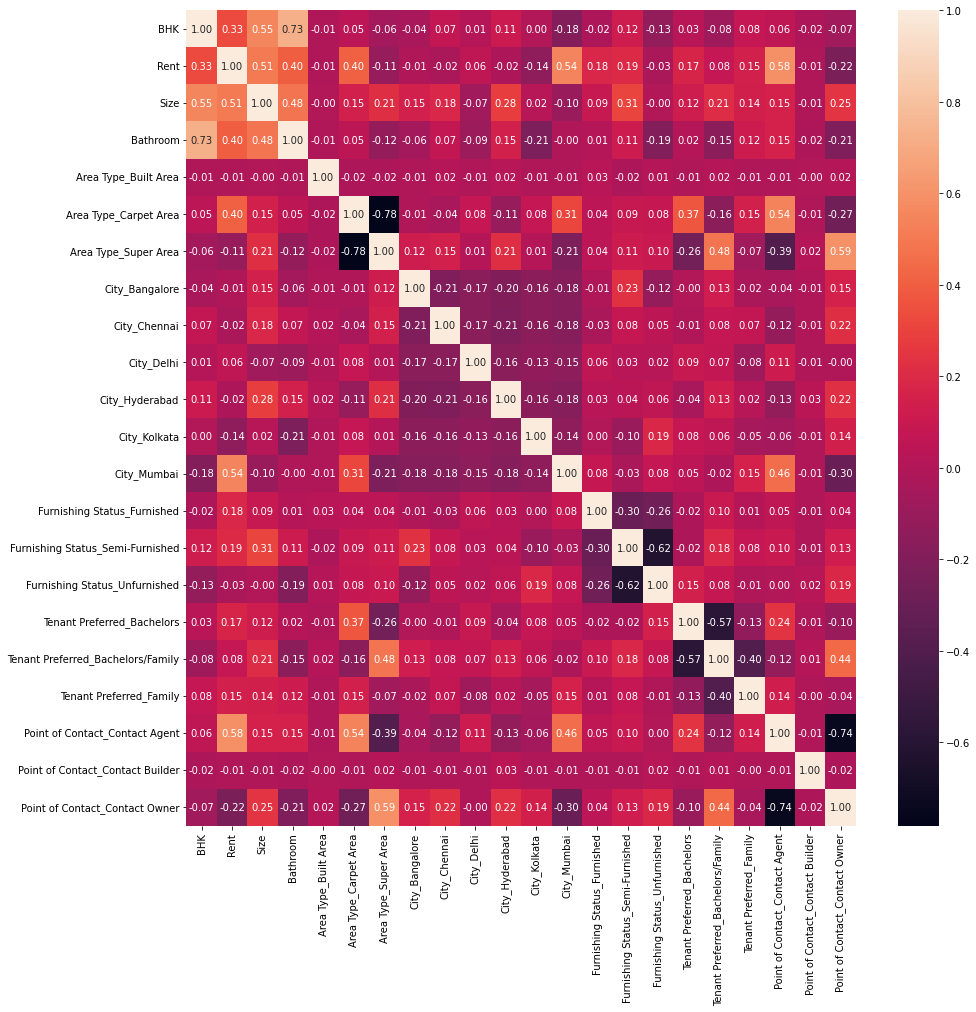

In [54]:
#Melihat korelasi antar kolom pada data setelah proses encoding
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

Fitur yang paling berpengaruh adalah size (0.51), city mumbai (0.54), dan contact owner (0.58).

# Modelling

In [55]:
#Memisahkan training dan testing data
X=df2.drop('Rent', axis=1)
y=df2['Rent']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [56]:
#Linear Regression Model
linearmodel=LinearRegression()
linearmodel.fit(X_train,y_train)
print("Linear Regression Training Accuracy:", linearmodel.score(X_train,y_train))
print("Linear Regression Testing Accuracy:", linearmodel.score(X_test,y_test))

Linear Regression Training Accuracy: 0.7422229042921697
Linear Regression Testing Accuracy: 0.7274248173777962


In [57]:
#Random Forest Regression Model
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test,y_test))

Random Forest Training Accuracy: 0.9421172276410631
Random Forest Testing Accuracy: 0.7512395462992076


In [58]:
#Decision Tree Model
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
print("Decision Tree Training Accuracy:", tree_model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", tree_model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.9687695419061364
Decision Tree Testing Accuracy: 0.6068622762630564


In [59]:
#LightGBM Model
xg_model = LGBMRegressor()
xg_model.fit(X_train, y_train)
print("LightGBM Training Accuracy:", xg_model.score(X_train,y_train))
print("LightGBM Testing Accuracy:", xg_model.score(X_test,y_test))

LightGBM Training Accuracy: 0.8559861785623437
LightGBM Testing Accuracy: 0.7755406041453974


In [60]:
#Gradient Boost Model
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", gb_model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", gb_model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.8153069053923592
Gradient Boost Testing Accuracy: 0.7680729879344201


## Model Evaluation

In [61]:
#Membuat fungsi evaluate untuk evaluasi model berdasarkan MAE, RMSE, dan R2 Score
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [62]:
#Evaluasi Linear Regression
evaluate(LinearRegression())

MAE: 5318.821018956531
RMSE: 7775.855415075933
R2 Score: 0.7274248173777962


In [63]:
#Evaluasi Random Forest
evaluate(RandomForestRegressor())

MAE: 4787.545463426408
RMSE: 7448.655991528417
R2 Score: 0.7498815129758116


In [64]:
#Evaluasi Decision Tree
evaluate(DecisionTreeRegressor())

MAE: 5802.103165765194
RMSE: 9318.2161132269
R2 Score: 0.6085687311501375


In [65]:
#Evaluasi LightGBM
evaluate(LGBMRegressor())

MAE: 4578.0235466226395
RMSE: 7056.249291240191
R2 Score: 0.7755406041453974


In [66]:
#Evaluasi Gradient Boost
evaluate(GradientBoostingRegressor())

MAE: 4561.396211978193
RMSE: 7167.182605615234
R2 Score: 0.7684275462314544


# Kesimpulan
Berdasarkan hasil modelling dan evaluasinya diperoleh kesimpulan bahwa model dengan akurasi terbaik adalah decision tree dengan nilai akurasi data training sebesar 0.9687695419061364. Namun, model decision tree juga memiliki Mean Absolute Error (MAE) yang paling besar dibanding model-model lainnya yaitu sebesar 5896.512965319758. Di samping itu, model dengan nilai MAE yang terkecil adalah gradient boost dengan nilai MAE sebesar 4557.634381011197. Jika diperhatikan dari keseluruhan model, maka model yang memiliki nilai akurasi dan MAE yang cukup baik adalah model random forest. Random forest memiliki nilai akurasi training data sebesar 0.9421467289553468, terbesar kedua setelah decision tree dan nilai MAE sebesar 4797.902090693383, terkecil ketiga setelah gradient boost dan LightGBM. Oleh karena itu, model random forest dapat disimpulkan sebagai model terbaik untuk dataset house rent prediction.